#**Model Building**

In Model Building, I experiment with Logistic Regression, Decision Trees, and Random Forest, optimize their hyperparameters, evaluate performance using metrics, and explore ensemble methods for improved accuracy.

#**Import Libraries and Load Preprocessed Dataset**
Start by importing the necessary libraries for model building, tuning, and evaluation, and then load the preprocessed dataset.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay


df = pd.read_csv('/content/preprocessed_customer_churn_dataset (1).csv')

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)




#**Experiment with Classification Algorithms**
Experiment with different algorithms like Logistic Regression, Decision Trees, and Random Forest, while respecting the modeling constraints.

- **Logistic Regression**



In [48]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

features = ["Age", "Gender", "ContractType", "MonthlyCharges", "TotalCharges", "TechSupport",
            "InternetService", "Tenure", "PaperlessBilling", "PaymentMethod"]
X = df[features]
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.72
Precision: 0.69
Recall: 0.75
F1 Score: 0.72
MCC: 0.44
Sensitivity: 0.75
Specificity: 0.69


- **Decision Tree**

In [9]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

features = ["Age", "Gender", "ContractType", "MonthlyCharges", "TotalCharges", "TechSupport",
            "InternetService", "Tenure", "PaperlessBilling", "PaymentMethod"]
X = df[features]
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.66
Precision: 0.20
Recall: 0.23
F1 Score: 0.21
MCC: -0.00
Sensitivity: 0.23
Specificity: 0.77


- **Random Forest**

In [10]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

features = ["Age", "Gender", "ContractType", "MonthlyCharges", "TotalCharges", "TechSupport",
            "InternetService", "Tenure", "PaperlessBilling", "PaymentMethod"]
X = df[features]
y = df['Churn']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.80
Precision: 0.43
Recall: 0.02
F1 Score: 0.03
MCC: 0.05
Sensitivity: 0.02
Specificity: 1.00


#**Preprocessing, Training, and Evaluation of Multiple Models for Churn Prediction**

In [11]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

numeric_features = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure']
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'PaperlessBilling', 'PaymentMethod']  # Your categorical features

X = df[numeric_features + categorical_features]
y = df['Churn']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = preprocessor.fit_transform(X_train)

X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

best_log_reg = LogisticRegression(random_state=42)
best_log_reg.fit(X_train, y_train)

best_dt = DecisionTreeClassifier(random_state=42)
best_dt.fit(X_train, y_train)

best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    return y_pred, y_pred_proba

print("Logistic Regression Performance:")
log_reg_pred, log_reg_proba = evaluate_model(best_log_reg, X_val, y_val)

print("\nDecision Tree Performance:")
dt_pred, dt_proba = evaluate_model(best_dt, X_val, y_val)

print("\nRandom Forest Performance:")
rf_pred, rf_proba = evaluate_model(best_rf, X_val, y_val)


Logistic Regression Performance:
Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC-AUC: 0.54

Decision Tree Performance:
Accuracy: 0.66
Precision: 0.21
Recall: 0.25
F1 Score: 0.23
ROC-AUC: 0.51

Random Forest Performance:
Accuracy: 0.80
Precision: 0.50
Recall: 0.02
F1 Score: 0.04
ROC-AUC: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Optimize Model Hyperparameters Using Grid Search**
Optimize hyperparameters for each model to find the best settings.

- **Grid Search for Logistic Regression**

In [14]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)


log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)


best_log_reg = log_reg_grid.best_estimator_
print(f"Best Parameters for Logistic Regression: {log_reg_grid.best_params_}")


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


- **Grid Search for Decision Tree**

In [15]:
dt = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
print(f"Best Parameters for Decision Tree: {dt_grid.best_params_}")

Best Parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


- **Grid Search for Random Forest**

In [16]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


# **Evaluate Model Performance**
Evaluate the model performance using ROC curves and AUC for better comparison.

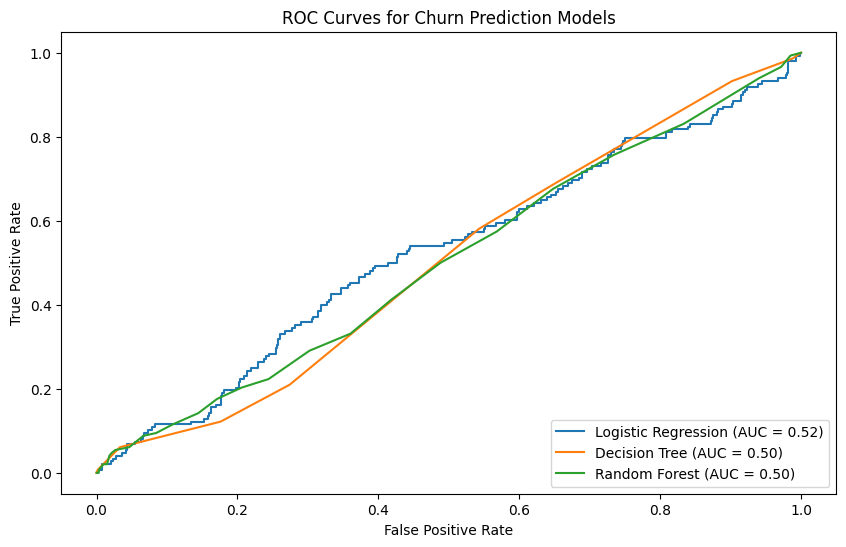

In [17]:
df = df.drop(columns=['CustomerID'], errors='ignore')

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

numeric_features = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure']
categorical_features = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'PaperlessBilling', 'PaymentMethod']  # Your categorical features

X = df[numeric_features + categorical_features]
y = df['Churn']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

best_log_reg.fit(X_train, y_train)
best_dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

def plot_roc_curve(models, X_val, y_val):
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = roc_auc_score(y_val, y_proba)


        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Churn Prediction Models')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

plot_roc_curve(models, X_val, y_val)


#**Ensemble Learning with Voting Classifier for Churn Prediction**
We Use ensemble methods like combining predictions from multiple models for improved performance.
- A VotingClassifier combines Logistic Regression, Decision Tree, and Random Forest using soft voting.
- The ensemble model is trained and evaluated for metrics like accuracy, precision, recall, F1 score, and AUC.

In [19]:
voting_model = VotingClassifier(estimators=[('lr', best_log_reg), ('dt', best_dt), ('rf', best_rf)], voting='soft')


voting_model.fit(X_train, y_train)

y_val_pred_voting = voting_model.predict(X_val)


voting_accuracy = accuracy_score(y_val, y_val_pred_voting)
voting_precision = precision_score(y_val, y_val_pred_voting)
voting_recall = recall_score(y_val, y_val_pred_voting)
voting_f1 = f1_score(y_val, y_val_pred_voting)
voting_auc = roc_auc_score(y_val, voting_model.predict_proba(X_val)[:, 1])

print("Ensemble Model Performance:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")
print(f"F1-Score: {voting_f1:.4f}")
print(f"AUC: {voting_auc:.4f}")


Ensemble Model Performance:
Accuracy: 0.8027
Precision: 0.5000
Recall: 0.0068
F1-Score: 0.0133
AUC: 0.5011


**Plotting the ROC Curve for the Ensemble Model**

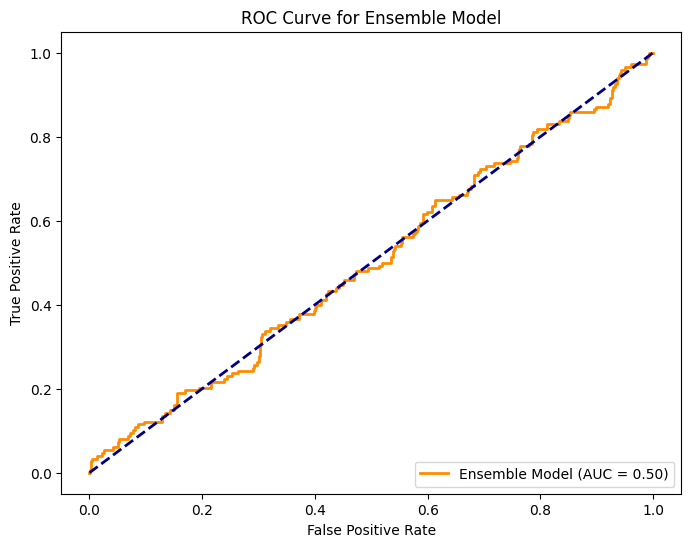

In [20]:
y_val_proba_voting = voting_model.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, y_val_proba_voting)
roc_auc = roc_auc_score(y_val, y_val_proba_voting)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Ensemble Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Model')
plt.legend(loc='lower right')
plt.show()


#**Model Selection and Evaluation**
Select and Evaluate Best-Performing Models: Decision Trees and Logistic Regression

**Model Evaluation Based on Randomized Search Results**

- Based on performance metrics from Randomized Search.
- Best model selected using aggregated score of accuracy, precision, recall, F1 score, and ROC AUC.
- Performance validated on test set, effectiveness visualized using ROC curve.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Model based on aggregated score (Randomized Search): Decision Tree (Random Search) with Aggregated Score: 0.3869

Test Set Performance of the Best Model (Decision Tree (Random Search)):
Accuracy: 0.3507
Precision: 0.2554
Recall: 0.9649
F1 Score: 0.4039
ROC AUC: 0.6122


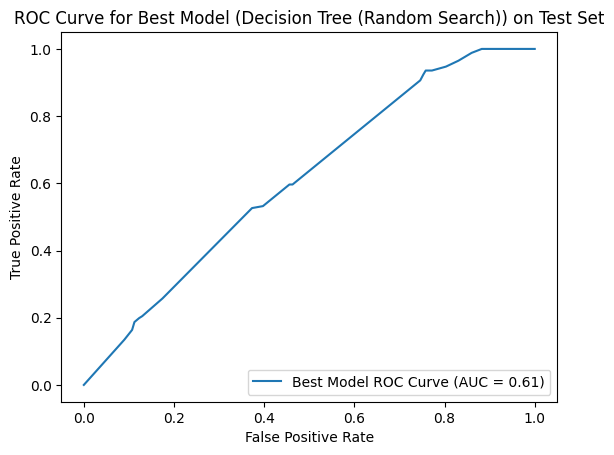

In [29]:
def aggregate_score(metrics):
    return np.mean(list(metrics.values()))

metrics_random = {
    'Logistic Regression (Random Search)': {
        'Accuracy': accuracy_score(y_val, y_val_pred_log_reg),
        'Precision': precision_score(y_val, y_val_pred_log_reg),
        'Recall': recall_score(y_val, y_val_pred_log_reg),
        'F1 Score': f1_score(y_val, y_val_pred_log_reg),
        'ROC AUC': roc_auc_score(y_val, best_log_reg.predict_proba(X_val)[:, 1])
    },
    'Decision Tree (Random Search)': {
        'Accuracy': accuracy_score(y_val, y_val_pred_dt),
        'Precision': precision_score(y_val, y_val_pred_dt),
        'Recall': recall_score(y_val, y_val_pred_dt),
        'F1 Score': f1_score(y_val, y_val_pred_dt),
        'ROC AUC': roc_auc_score(y_val, best_dt.predict_proba(X_val)[:, 1])
    }
}


aggregated_scores_random = {name: aggregate_score(scores) for name, scores in metrics_random.items()}


best_model_name_random = max(aggregated_scores_random, key=aggregated_scores_random.get)
print(f"Best Model based on aggregated score (Randomized Search): {best_model_name_random} with Aggregated Score: {aggregated_scores_random[best_model_name_random]:.4f}")


best_model_random = best_log_reg if 'Logistic Regression' in best_model_name_random else best_dt

y_test_pred = best_model_random.predict(X_test)
y_test_proba = best_model_random.predict_proba(X_test)[:, 1]


print(f"\nTest Set Performance of the Best Model ({best_model_name_random}):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")


fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Best Model ROC Curve (AUC = {roc_auc_score(y_test, y_test_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Best Model ({best_model_name_random}) on Test Set')
plt.legend(loc='lower right')
plt.show()


#**Comparison of Best Models from Grid Search and Randomized Search**

- Based on aggregated score from multiple metrics.
- Identifies best model from each search method.
- Determines model's most effective.

Logistic Regression Precision: 0.0000
Decision Tree Precision: 0.5000
Selected Model: Decision Tree


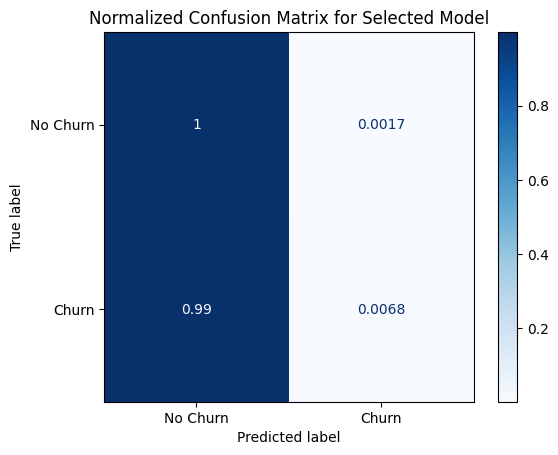

In [23]:
y_val_pred_log_reg = best_log_reg.predict(X_val)

y_val_pred_dt = best_dt.predict(X_val)


precision_log_reg = precision_score(y_val, y_val_pred_log_reg, zero_division=0)
precision_dt = precision_score(y_val, y_val_pred_dt, zero_division=0)

print(f"Logistic Regression Precision: {precision_log_reg:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")


best_model = best_log_reg if precision_log_reg > precision_dt else best_dt
print(f"Selected Model: {'Logistic Regression' if best_model == best_log_reg else 'Decision Tree'}")

y_val_pred_best = best_model.predict(X_val)


conf_matrix = confusion_matrix(y_val, y_val_pred_best)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Selected Model')
plt.show()


**Feature Importance Analysis**

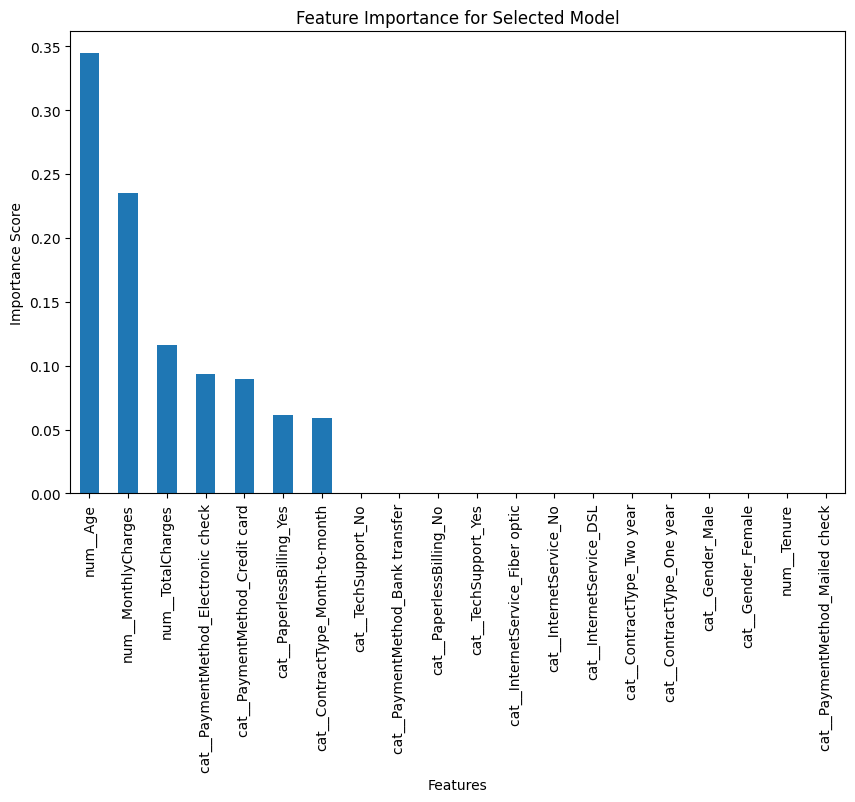

In [24]:
if best_model == best_dt:

    feature_importance = pd.Series(best_model.feature_importances_, index=preprocessor.get_feature_names_out()).sort_values(ascending=False)
elif best_model == best_log_reg:

    feature_importance = pd.Series(best_model.coef_[0], index=preprocessor.get_feature_names_out()).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Selected Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()



**Imbalanced Dataset Evaluation**

In [25]:
non_churn = df[df['Churn'] == 0]
churn = df[df['Churn'] == 1]

non_churn_downsampled = non_churn.sample(frac=0.1, random_state=42)
imbalanced_df = pd.concat([non_churn_downsampled, churn])


X_imbalanced = imbalanced_df[numeric_features + categorical_features]
y_imbalanced = imbalanced_df['Churn']


X_imbalanced = preprocessor.transform(X_imbalanced)

best_model.fit(X_imbalanced, y_imbalanced)

y_val_pred_imbalanced = best_model.predict(X_val)
imbalanced_precision = precision_score(y_val, y_val_pred_imbalanced)
print(f"Precision on Imbalanced Dataset: {imbalanced_precision:.4f}")


Precision on Imbalanced Dataset: 0.2172


**Comparing Model Performance on Original and Imbalanced Datasets**

In [26]:

precision_original = precision_score(y_val, y_val_pred_best)
print(f"Precision on Original Dataset: {precision_original:.4f}")
print(f"Precision on Imbalanced Dataset: {imbalanced_precision:.4f}")


Precision on Original Dataset: 0.5000
Precision on Imbalanced Dataset: 0.2172


**Saving the Model for Future Use**

In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
from google.colab import files  # If you're using Google Colab

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Save the model to a file
model_filename = 'model.json'
xgb_model.save_model(model_filename)
print("Model saved successfully.")

# Download the model file (for Google Colab)
files.download(model_filename)


Model saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>